Loading trained model at iteration 30000
Found transforms_train.json file, assuming Blender data set!
Reading Training Transforms


Loading Training Cameras
Loading Test Cameras
Loading trained model at iteration 30000
Found transforms_train.json file, assuming Blender data set!
Reading Training Transforms
Loading Training Cameras
Loading Test Cameras
Loading trained model at iteration 70000
Loading Training Cameras
Loading Test Cameras


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


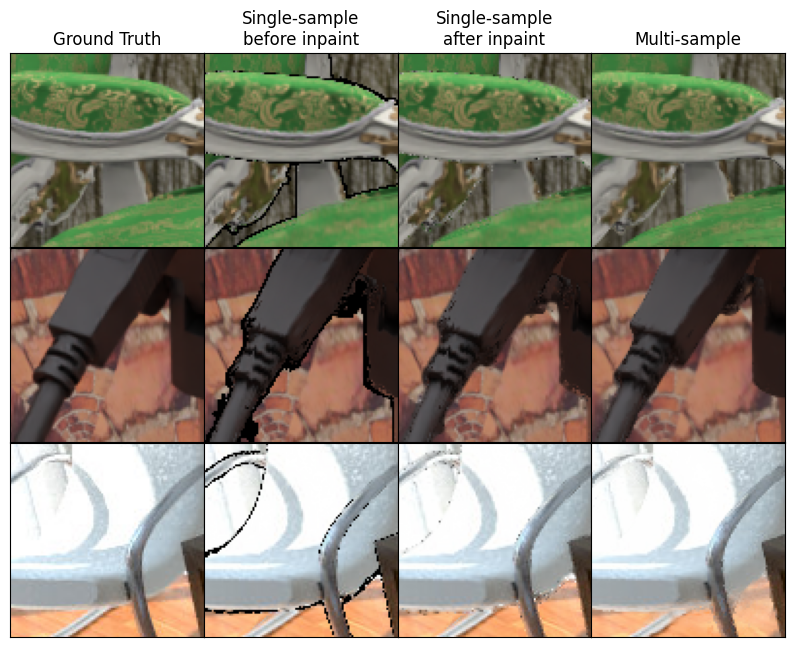

In [9]:
from matplotlib import axis
from arguments import ModelParams, ArgumentParser, PipelineParams
from depth_images import calibrate_depth
from gaussian_renderer import GaussianModel
from scene import Scene
import torch
import matplotlib.pyplot as plt

parser = ArgumentParser()
pipe = PipelineParams(parser)

def load_scene(scene_name, model_name):
    parser = ArgumentParser()
    dataset = ModelParams(parser)
    dataset.model_path = f"output/{model_name}/"
    #dataset.source_path = "../data/icl-nuim/livingroom1/"
    dataset.source_path = f"../data/{scene_name}/"
    dataset.images = "images"
    dataset.resolution = -1
    dataset.white_background = False
    dataset.initialisation = "depth"
    dataset.eval=True
    dataset.num_train_images = 100 if "room" in model_name else 50
    gaussians = GaussianModel(dataset.sh_degree)
    scene = Scene(dataset, gaussians,shuffle=False,load_iteration=70000 if "room" in model_name else 30000)
    import os
    scene.gaussians.load_ply(os.path.join(scene.model_path,"point_cloud","iteration_" + str(scene.loaded_iter),"point_cloud.ply"))
    return scene, gaussians

scenes = {
    "chair_background2_slow": [
        #(3,(0,800,0,800)),
        (12,(325,425,250,350))
    ],
    "mic_slow": [
        #(3,(0,800,0,800)),
        (1,(325,425,250,350))
    ],
    # "ship_slow": [
    #     (5,(0,800,0,800)),
    #     (5,(275,425,200,350))
    # ],
    "livingroom_slow": [
        (82,(150,250,0,100))
    ]
    # "mic_slow": [
    #     (5,(100,200,375,475))
    # ],
}

bg = torch.tensor([0,0,0], dtype=torch.float32, device="cuda")

from gaussian_renderer import render
from textured_render import prerender_depth, textured_render_per_gaussian, textured_render_multicam

fig, axs = plt.subplots(3,4, figsize=(10, 7.6))

axs_idx = 0
for scene_name, image_names in scenes.items():
    scene, gaussians = load_scene(scene_name[:-5], scene_name+"_depth")
    for image_idx, bbox in image_names:
        
        view_camera = scene.getTestCameras()[image_idx]
        with torch.no_grad():
            render_pkg_multi = textured_render_per_gaussian(view_camera, scene.getTrainCameras(),gaussians, pipe, bg,in_training=False)
            render_pkg = textured_render_multicam(
                view_camera,
                scene.getTrainCameras(),
                gaussians,
                pipe,
                bg,
                blend_mode="alpha"
            )
            
        # plt.imshow(view_camera.original_image.cpu().detach().permute((1,2,0))[bbox[0]:bbox[1],bbox[2]:bbox[3]])
        # plt.show()

        # plt.imshow(render_pkg["render_textured"][:3].cpu().detach().permute((1,2,0))[bbox[0]:bbox[1],bbox[2]:bbox[3]])
        # plt.show()
        # plt.imshow((render_pkg["before_blend_mask"])[:3].cpu().detach().permute((1,2,0))[bbox[0]:bbox[1],bbox[2]:bbox[3]])
        # plt.show()
        # plt.imshow((render_pkg["before_blend_mask"]*render_pkg["before_blend"])[:3].cpu().detach().permute((1,2,0))[bbox[0]:bbox[1],bbox[2]:bbox[3]])
        # plt.show()
        # plt.imshow(render_pkg["render_depth"][:3].cpu().detach().permute((1,2,0))[bbox[0]:bbox[1],bbox[2]:bbox[3]])
        # plt.show()
        
        # plt.imshow((render_pkg["texture_masks"][0]*render_pkg["texture_colors"][0])[:3].cpu().detach().permute((1,2,0))[bbox[0]:bbox[1],bbox[2]:bbox[3]])
        # plt.show()
        # plt.imshow((render_pkg["texture_masks"][1]*render_pkg["texture_colors"][1])[:3].cpu().detach().permute((1,2,0))[bbox[0]:bbox[1],bbox[2]:bbox[3]])
        # plt.show()
        # plt.imshow((render_pkg["texture_masks"][2]*render_pkg["texture_colors"][2])[:3].cpu().detach().permute((1,2,0))[bbox[0]:bbox[1],bbox[2]:bbox[3]])
        # plt.show()
        
        
        ax = axs[axs_idx]
        ax[0].imshow(view_camera.original_image.cpu().detach().permute((1,2,0))[bbox[0]:bbox[1],bbox[2]:bbox[3]])
        
        ax[1].imshow(render_pkg["before_blend"][:3].cpu().detach().permute((1,2,0))[bbox[0]:bbox[1],bbox[2]:bbox[3]])
        
        
        ax[3].imshow((render_pkg_multi["render_textured"])[:3].cpu().detach().permute((1,2,0))[bbox[0]:bbox[1],bbox[2]:bbox[3]])
        
        ax[2].imshow((render_pkg["render_textured"])[:3].cpu().detach().permute((1,2,0))[bbox[0]:bbox[1],bbox[2]:bbox[3]])
        
        if axs_idx==0:
            ax[0].set_title("Ground Truth")
            ax[1].set_title("Single-sample\nbefore inpaint")
            ax[3].set_title("Multi-sample")
            ax[2].set_title("Single-sample\nafter inpaint")

        for ax in ax.flat:
            ax.set_xticks([])
            ax.set_yticks([])
        
        axs_idx += 1
        
# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig("./figures/multisample_compare.pdf", dpi=800,bbox_inches="tight", pad_inches=0)
# Show the figure
plt.show()

Loading trained model at iteration 30000
Found transforms_train.json file, assuming Blender data set!
Reading Training Transforms
Loading Training Cameras
Loading Test Cameras
Loading trained model at iteration 30000
Found transforms_train.json file, assuming Blender data set!
Reading Training Transforms
Loading Training Cameras
Loading Test Cameras
Loading trained model at iteration 70000
Loading Training Cameras
Loading Test Cameras


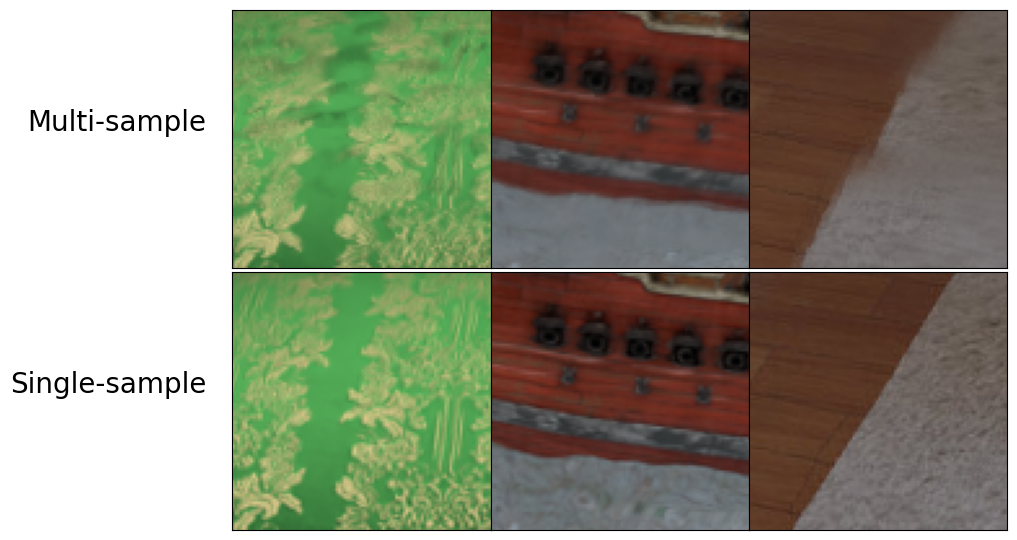

In [13]:
from matplotlib import axis
from arguments import ModelParams, ArgumentParser, PipelineParams
from depth_images import calibrate_depth
from gaussian_renderer import GaussianModel
from scene import Scene
import torch
import matplotlib.pyplot as plt

parser = ArgumentParser()
pipe = PipelineParams(parser)

def load_scene(scene_name, model_name):
    parser = ArgumentParser()
    dataset = ModelParams(parser)
    dataset.model_path = f"output/{model_name}/"
    #dataset.source_path = "../data/icl-nuim/livingroom1/"
    dataset.source_path = f"../data/{scene_name}/"
    dataset.images = "images"
    dataset.resolution = -1
    dataset.white_background = False
    dataset.initialisation = "depth"
    dataset.eval=True
    dataset.num_train_images = 100 if "room" in model_name else 50
    gaussians = GaussianModel(dataset.sh_degree)
    scene = Scene(dataset, gaussians,shuffle=False,load_iteration=70000 if "room" in model_name else 30000)
    import os
    scene.gaussians.load_ply(os.path.join(scene.model_path,"point_cloud","iteration_" + str(scene.loaded_iter),"point_cloud.ply"))
    return scene, gaussians

scenes = {
    "chair_background2_slow": [
        (3,(400,500,300,400)),
        #(12,(325,425,250,350))
    ],
    "ship_slow": [
        (3,(450,550,300,400))
    ],
    "livingroom_slow": [
        (65,(300,400,100,200))
    ]
    # "mic_slow": [
    #     (5,(100,200,375,475))
    # ],
}

bg = torch.tensor([0,0,0], dtype=torch.float32, device="cuda")

from gaussian_renderer import render
from textured_render import prerender_depth, textured_render_per_gaussian, textured_render_multicam

fig, axs = plt.subplots(2,3, figsize=(10, 6.8))

axs_idx = 0
for scene_name, image_names in scenes.items():
    scene, gaussians = load_scene(scene_name[:-5], scene_name+"_depth")
    for image_idx, bbox in image_names:
        
        view_camera = scene.getTestCameras()[image_idx]
        with torch.no_grad():
            render_pkg_multi = textured_render_per_gaussian(view_camera, scene.getTrainCameras(),gaussians, pipe, bg,in_training=False)
            render_pkg = textured_render_multicam(
                view_camera,
                scene.getTrainCameras(),
                gaussians,
                pipe,
                bg,
                blend_mode="alpha"
            )
        
        axs[0][axs_idx].imshow(view_camera.original_image.cpu().detach().permute((1,2,0))[bbox[0]:bbox[1],bbox[2]:bbox[3]])
        
        axs[1][axs_idx].imshow(render_pkg["before_blend"][:3].cpu().detach().permute((1,2,0))[bbox[0]:bbox[1],bbox[2]:bbox[3]])
        
        
        axs[0][axs_idx].imshow((render_pkg_multi["render_textured"])[:3].cpu().detach().permute((1,2,0))[bbox[0]:bbox[1],bbox[2]:bbox[3]])
        
        axs[1][axs_idx].imshow((render_pkg["render_textured"])[:3].cpu().detach().permute((1,2,0))[bbox[0]:bbox[1],bbox[2]:bbox[3]])
        
        if axs_idx==0:
            axs[0][axs_idx].set_title("Multi-sample",loc="right", x=-0.1, y=0.5,fontsize=20)
            axs[1][axs_idx].set_title("Single-sample",loc="right", x=-0.1, y=0.5,fontsize=20)
        
        axs_idx += 1
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])
# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig("./figures/multisample_compare_blur.pdf", dpi=800,bbox_inches="tight", pad_inches=0)
# Show the figure
plt.show()

In [2]:
[i for i in range(100) if scene.getTestCameras()[i].image_name=='42']

[81]

In [3]:
scene.getTestCameras()[91].image_name

'672'

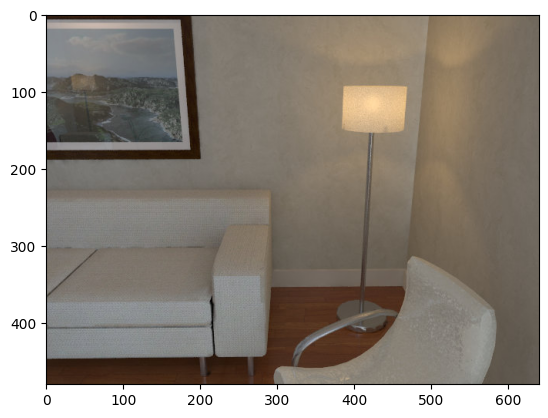

In [4]:
plt.imshow(scene.getTestCameras()[30].original_image.cpu().detach().permute((1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


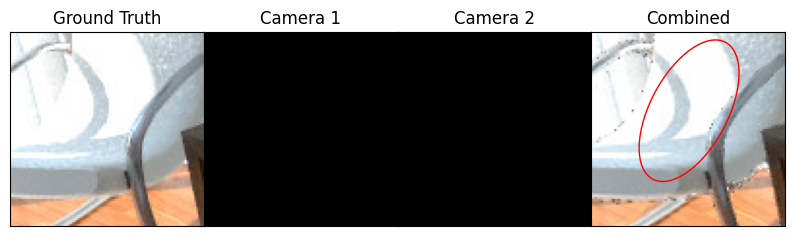

In [5]:
fig, axs = plt.subplots(1,4, figsize=(10, 7))

axs[0].imshow(view_camera.original_image.cpu().detach().permute((1,2,0))[bbox[0]:bbox[1],bbox[2]:bbox[3]])
axs[0].set_title("Ground Truth")

axs[3].imshow(render_pkg["render_textured"][:3].cpu().detach().permute((1,2,0))[bbox[0]:bbox[1],bbox[2]:bbox[3]])
axs[3].set_title("Combined")

from matplotlib.patches import Ellipse
ellipse = Ellipse(xy=(50, 40), width=40, height=80, angle=28, edgecolor='r', fc='None', lw=1)
axs[3].add_patch(ellipse)

axs[1].imshow((render_pkg["texture_masks"][0]*render_pkg["texture_colors"][0])[:3].cpu().detach().permute((1,2,0))[bbox[0]:bbox[1],bbox[2]:bbox[3]])
axs[1].set_title("Camera 1")

axs[2].imshow((render_pkg["texture_masks"][1]*render_pkg["texture_colors"][1])[:3].cpu().detach().permute((1,2,0))[bbox[0]:bbox[1],bbox[2]:bbox[3]])
axs[2].set_title("Camera 2")

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig("./figures/armchair-shadow.pdf", dpi=800,bbox_inches="tight", pad_inches=0)
# Show the figure
plt.show()